The process of making data ready for analysis is called `Data Wrangling`.

### Data Cleaning

Generally the data that we collect is not ready for analysis. It has various issues like:
- Missing Values
- Incorrect Format
- Duplicate Values
- Incorrect Data
- Unnecessary Data
- Improper Column Names etc

#### Missing Data

Data could be missing because of various reasons like the observation does not exist, was not observed or was not recorded properly.

Missing data is often represented in following ways:
- NA, N/A
- Blank cell
- Dashes (-, --)
- Values like -1, 999

We can do following to handle missing data:
- Deleting observations(rows) with missing or invalid values.
- Substituting or filling them with suitable values.
- Deleting or keeping outlier based on whether they are good or bad.
- Deleting the duplicates if they are not valid.

Some methods we use to filter out the missing data:
- `isnull()` - to identify the missing values
- `notnull()` - opposite of isnull()
- `dropna()` - to drop the observations consisting of missing values. Here we can mention some parameters to properly drop the observations.

Some methods to impute/fill the missing values:
- Fill with a constant value.
- Fill with the mean or median of the data in case of numerical data.
- Advance inputation with KNN Imputation.
- And in the case of Time-Series data we can use:
    - Forward Fill (ffill)
    - Backward Fill (bfill)

#### Indexing the columns to filter rows

- `df[0]` filters the first column.

- `df[0].notnull()` applies the notnull() operation over the df[0] series and returns a series of True/False values.

- `df[df[0].notnull()]` returns those rows of the DataFrame where the first column has non-null values.

#### Indexing the rows to filter columns

- `df.loc[0]` filters the first row.

- `df.loc[0].notnull()` applies the notnull() operation over the df.loc[0] DataFrame and returns a DataFrame of True/False values corresponding to the first row.

- `df.loc[:,df.loc[0].notnull()]` returns those columns of the DataFrame where the first row has non-null values.

### Different types of missing data
But there’s more to missing data than missingness. Missing data comes in four varieties:

- **Structurally Missing Data**: we expect this data to be missing for some logical reason


- **Missing Completely at Random (MCAR)**: the probability of any datapoint being MCAR is the same for all data points – this type of missing data is mostly hypothetical. MCAR data is truly only MCAR if every `potential observation` is equally likely to be missing a value for that variable. There’s no logic, no outside force, or unseen behavior. It’s just a completely random, fluke occurrence that there isn’t data.


- **Missing at Random (MAR)**: Missing at Random might be the most complex of the missing data types. If the likelihood of missingness is different for different groups, but equally likely within a group, then that data is missing at random. It’s kind of a hybrid of missing for a reason and missing completely at random. Ex : several scientific studies have shown that individuals do not like to report their weight, especially when they have a Body Mass Index (BMI) outside of the “normal” range. This is an example of Missing at Random data because we can assume that some groups are not reporting their weight for a reason, but that anyone within that group (i.e., someone with a non-“normal” BMI) has an equal probability of not reporting their weight.


- **Missing Not at Random (MNAR)** : There is some reason why the data is missing

### <font color = 'green'>Let's deal with the missing data and clean it

In [2]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
data = pd.read_csv('melbourne.csv')

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Identifying Missing Values

The methods ```isnull()``` and ```notnull()``` are the most common ways of identifying missing values. 

While handling missing data, you first need to identify the rows and columns containing missing values, count the number of missing values, and then decide how you want to treat them.

It is important that **you treat missing values in each column separately**, rather than implementing a single solution (e.g. replacing NaNs by the mean of a column) for all columns.

```isnull()``` returns a boolean (True/False) which can then be used to find the rows or columns containing missing values.

In [4]:
#Check the number of missing values in each column
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

In [5]:
#count of columns which has atleast 1 missing value
data.isnull().any().sum()

14

In [6]:
#list of all the columns which has any missing values
data.columns[data.isnull().any()]

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [7]:
#list of all the rows which has atleast one missing value
data.isnull().any(axis = 1)

0         True
1         True
2        False
3         True
4        False
         ...  
23542     True
23543     True
23544     True
23545     True
23546     True
Length: 23547, dtype: bool

In [8]:
#select the rows in which all the values are missing
data[data.isnull().all(axis=1)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


As of now, we have identified the missing values in rows and columns. Now we need to treat them appropriately.

**There are mainly two things we can do to treat the missing values:**
1. Delete the missing value
    - Delete the rows consisting of missing values
    - Delete the columns consisting of missing values
2. Impute/ Fill the missing values
    - With a constant, mean, median, mode etc
    - Using predictive models like KNN, SVM etc. 
    
Now keep in mind that if delete the missing values then we loose a lot of data and we might not be left with enough data to work with. And when we fill, we fill with assumed values which might bring a lot of made up values in our data. That way we loose authenticity of the data.

### Let's treat missing values in a column

In [9]:
round(100*(data.isnull().sum()/len(data)), 2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.88
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         19.03
Bathroom         19.04
Car              19.65
Landsize         26.06
BuildingArea     57.46
YearBuilt        50.99
CouncilArea      33.51
Lattitude        18.28
Longtitude       18.28
Regionname        0.00
Propertycount     0.00
dtype: float64

Above we can see a lot of missing values in few columns. So to decide whether to delete the missing values or fill it, we need to look at the:
- The importance of a given column
- The size the data available to us.
- And the task for which the data is being used.

For example, if you look at the `price` column, that is the most important column if we are going to use this data for predictive modelling, so we can't delete that column.

On the other hand we have columns like `BuildingArea` and `YearBuilt` which has more than 50% data. Here we can't delete the rows or fill the values since either we will loose more than half the data or we bring in a heavy bias in the data by filling it.

In [10]:
#dropping the columns which missing values more than 30%
data.drop(columns = ['BuildingArea', 'YearBuilt', 'CouncilArea'], inplace = True) 

### Let's treat the missing values in rows 

In [11]:
round((data.isnull().sum()/len(data)) * 100, 2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.88
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         19.03
Bathroom         19.04
Car              19.65
Landsize         26.06
Lattitude        18.28
Longtitude       18.28
Regionname        0.00
Propertycount     0.00
dtype: float64

In [12]:
data.shape

(23547, 18)

Now we are left with 18 columns which means 18 values in every row. So if any row has suppose more than 5 missing values then we would drop those.

In [13]:
data[data.isnull().sum(axis = 1) > 5]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,08-10-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,08-10-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,08-10-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10-12-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10-12-2016,2.5,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23495,Templestowe Lower,1/207 Manningham Rd,2,u,550000.0,PI,Barry,26-08-2017,12.4,3107.0,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,5420.0
23499,Thornbury,1/128 Dundas St,2,t,770000.0,PI,McGrath,26-08-2017,7.0,3071.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
23502,Thornbury,111 Pender St,2,t,858000.0,S,Jellis,26-08-2017,7.0,3071.0,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
23508,Toorak,21/1059 Malvern Rd,2,u,720000.0,VB,Beller,26-08-2017,4.1,3142.0,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7217.0


In [14]:
sorted_data = data.sort_values('Lattitude', ascending = False)

<AxesSubplot:>

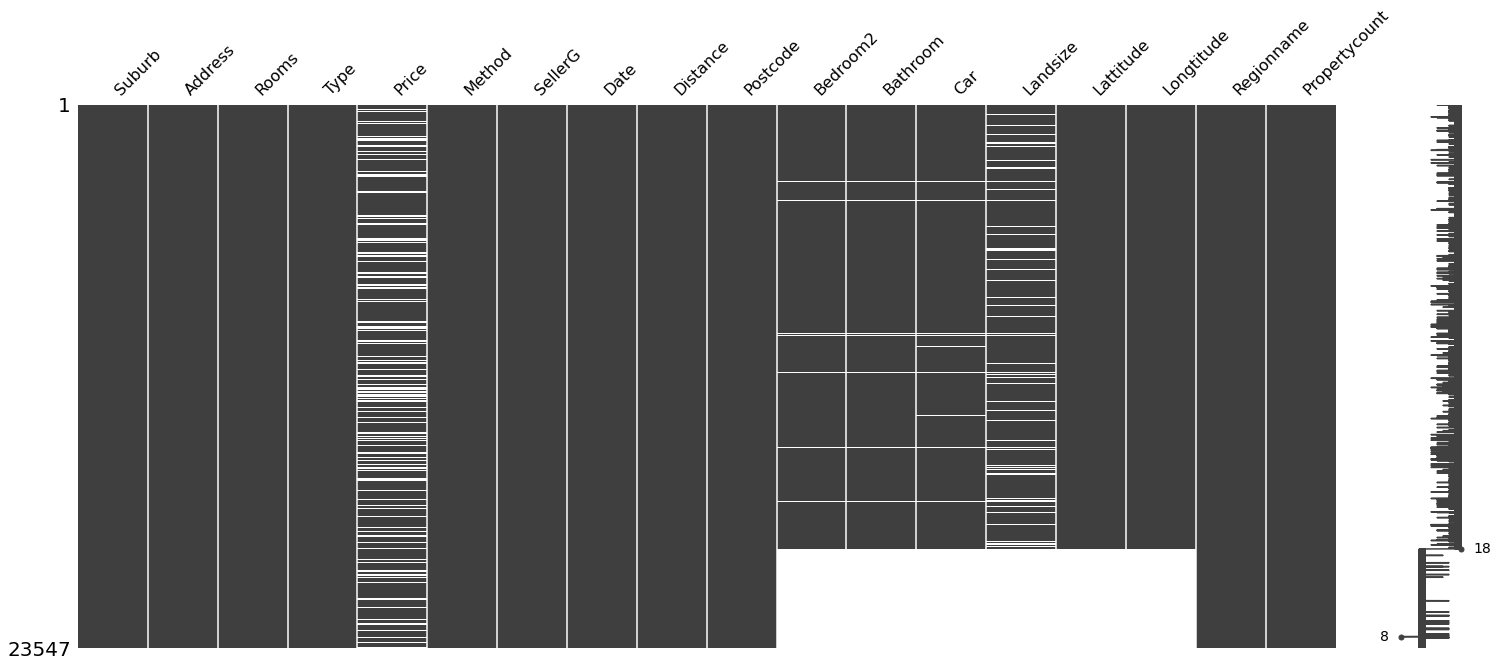

In [15]:
msno.matrix(sorted_data)

If we notice the above output, we can see a clear pattern that in many of the rows the same column values are missing which indicates that the data collection was not properly done for these houses. Hence we might drop these because they are probably not very useful for us.

In [16]:
len(data[data.isnull().sum(axis = 1) > 5])

4278

In [17]:
(len(data[data.isnull().sum(axis = 1) > 5])/ len(data))*100

18.16791948018856

We have 18% rows which consists of missing values. Here we are going to drop these.

In [18]:
data = data[~(data.isnull().sum(axis = 1) > 5)]

In [19]:
round((data.isnull().sum()/len(data)) * 100, 2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.71
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2          1.05
Bathroom          1.07
Car               1.81
Landsize          9.65
Lattitude         0.13
Longtitude        0.13
Regionname        0.00
Propertycount     0.00
dtype: float64

- Most of the missing values are treated but we still have a large amount of missing values in Price column. So are going to fill these or delete?

- As we saw before, the `price` column is the most important column if we are going to use this data for predictive modelling. So if we decide to fill these then our data will have huge bias and it will become more synthetic rather than original and genuine.

- Hence we decide to delete the rows where the `price` is missing

In [20]:
data = data[~np.isnan(data['Price'])]

In [21]:
data.shape

(15086, 18)

Now going to the `Landsize` column, we will see whether we can impute the missing values or not.

The decision to impute the missing value depends on the spread/distribution of the data in that column. If the spread of the data is very then we can impute otherwise it will be risky.

In [22]:
data['Landsize'].describe()

count     13603.000000
mean        558.116371
std        3987.326586
min           0.000000
25%         176.500000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

Here since the variation in the data is too high so we can't impute. We will rather go for deleting the missing values.

In [23]:
data = data[~np.isnan(data['Landsize'])]

Next, let's look at `Lattitude and Longtitude` columns. There is a high chance that the same rows will have both the values missing since both are written together and one of these don't make sense alone. 

In [24]:
#rows with Lattitude values missing
data[np.isnan(data['Lattitude'])] #output confirms that both values are missing together in same rows

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
2572,Burwood,23 Monica St,3,h,990000.0,VB,Fletchers,17-09-2016,11.7,3125.0,3.0,2.0,2.0,263.0,NaN,NaN,Southern Metropolitan,5678.0
3257,Clifton Hill,3/268 Alexandra Pde E,1,u,363000.0,S,hockingstuart,27-06-2016,3.4,3068.0,1.0,1.0,1.0,0.0,NaN,NaN,Northern Metropolitan,2954.0
4485,Footscray,483 Barkly St,3,t,781000.0,S,Jas,27-11-2016,6.4,3011.0,3.0,2.0,2.0,98.0,NaN,NaN,Western Metropolitan,7570.0
5170,Hampton East,7 Seafoam St,4,t,1185000.0,S,RT,28-05-2016,14.5,3188.0,4.0,3.0,1.0,300.0,NaN,NaN,Southern Metropolitan,2356.0
10745,Williamstown North,4/9 Adeline St,1,u,355000.0,S,Sweeney,27-11-2016,8.9,3016.0,1.0,1.0,1.0,46.0,NaN,NaN,Western Metropolitan,802.0
13223,Melbourne,1913/228 Abeckett St,3,u,1175000.0,PI,Icon,29-04-2017,2.8,3000.0,3.0,3.0,2.0,0.0,NaN,NaN,Northern Metropolitan,17496.0
14008,Brooklyn,9 Richards Ct,3,h,750000.0,S,hockingstuart,20-05-2017,10.9,3012.0,3.0,1.0,2.0,667.0,NaN,NaN,Western Metropolitan,962.0
14132,North Melbourne,13/201 Abbotsford St,2,t,755000.0,PI,Nelson,29-04-2017,2.3,3051.0,2.0,1.0,1.0,1537.0,NaN,NaN,Northern Metropolitan,6821.0
14139,Oakleigh South,4 Druitt St,4,h,1205500.0,S,Woodards,22-04-2017,14.7,3167.0,4.0,2.0,2.0,553.0,NaN,NaN,South-Eastern Metropolitan,3692.0
14142,Oakleigh South,298 Warrigal Rd,3,h,799999.0,S,Woodards,29-04-2017,14.7,3167.0,3.0,2.0,4.0,590.0,NaN,NaN,South-Eastern Metropolitan,3692.0


In [25]:
data[['Lattitude', 'Longtitude']].describe()

,Lattitude,Longtitude
count,13581.000000,13581.000000
mean,-37.809204,144.995221
std,0.079257,0.103913
min,-38.182550,144.431810
25%,-37.856820,144.929600
50%,-37.802360,145.000100
75%,-37.756400,145.058320
max,-37.408530,145.526350


In [26]:
data['Lattitude'] = data['Lattitude'].fillna(data['Lattitude'].mean())
data['Longtitude'] = data['Longtitude'].fillna(data['Longtitude'].mean())

In [27]:
round((data.isnull().sum()/len(data)) * 100, 2)

Suburb           0.00
Address          0.00
Rooms            0.00
Type             0.00
Price            0.00
Method           0.00
SellerG          0.00
Date             0.00
Distance         0.00
Postcode         0.00
Bedroom2         0.00
Bathroom         0.01
Car              0.46
Landsize         0.00
Lattitude        0.00
Longtitude       0.00
Regionname       0.00
Propertycount    0.00
dtype: float64

Let's fix the last two remaining columns `Car` and `Bathroom`.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13603 entries, 1 to 23545
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13603 non-null  object 
 1   Address        13603 non-null  object 
 2   Rooms          13603 non-null  int64  
 3   Type           13603 non-null  object 
 4   Price          13603 non-null  float64
 5   Method         13603 non-null  object 
 6   SellerG        13603 non-null  object 
 7   Date           13603 non-null  object 
 8   Distance       13603 non-null  float64
 9   Postcode       13603 non-null  float64
 10  Bedroom2       13603 non-null  float64
 11  Bathroom       13602 non-null  float64
 12  Car            13540 non-null  float64
 13  Landsize       13603 non-null  float64
 14  Lattitude      13603 non-null  float64
 15  Longtitude     13603 non-null  float64
 16  Regionname     13603 non-null  object 
 17  Propertycount  13603 non-null  float64
dtypes: flo

Here car and bathroom columns are in float which is incorrect as there can't be 1.3 bathrooms or 2.4 cars. So we need to change the datatype of this column to object type.

In [29]:
data['Car'] = data['Car'].astype('object')
data['Bathroom'] = data['Bathroom'].astype('object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13603 entries, 1 to 23545
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13603 non-null  object 
 1   Address        13603 non-null  object 
 2   Rooms          13603 non-null  int64  
 3   Type           13603 non-null  object 
 4   Price          13603 non-null  float64
 5   Method         13603 non-null  object 
 6   SellerG        13603 non-null  object 
 7   Date           13603 non-null  object 
 8   Distance       13603 non-null  float64
 9   Postcode       13603 non-null  float64
 10  Bedroom2       13603 non-null  float64
 11  Bathroom       13602 non-null  object 
 12  Car            13540 non-null  object 
 13  Landsize       13603 non-null  float64
 14  Lattitude      13603 non-null  float64
 15  Longtitude     13603 non-null  float64
 16  Regionname     13603 non-null  object 
 17  Propertycount  13603 non-null  float64
dtypes: flo

In [31]:
data['Car'].value_counts()

2.0     5606
1.0     5515
0.0     1026
3.0      748
4.0      507
5.0       63
6.0       54
8.0        9
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [32]:
data['Car'] = data['Car'].fillna(2)

In [33]:
data['Bathroom'].value_counts()

1.0    7517
2.0    4987
3.0     921
4.0     106
0.0      34
5.0      28
6.0       5
7.0       2
8.0       2
Name: Bathroom, dtype: int64

In [34]:
data['Bathroom'] = data['Bathroom'].fillna(1.0)

In [35]:
data['Bathroom']

1        1.0
2        1.0
4        2.0
5        2.0
6        1.0
        ... 
23537    2.0
23538    2.0
23539    2.0
23541    1.0
23545    1.0
Name: Bathroom, Length: 13603, dtype: float64

#### We can also KNN imputation instead of imputing with mean or median

In [21]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()

In [23]:
data_2['Price'] = knn_imputer.fit_transform(data_2[['Price']])

In [26]:
data_2['Price'] = round(data_2['Price'], 2)

### Iterative Imputer for continous imputations

### <font color = 'maroon'>Few key takeaways from handling the missing to keep in mind</font>

- We can't just delete the missing values because that will result in loss of huge amount of data and then the data might not represent what happens really in the data and we would not confidence in the accuracy of the insights and observations.
    - But we can safely delete the data when it is `MAR` or `MCAR` since the data loss is completely random and not because of any reason. However in this case if the missing data is too large then we can't delete all of it.
    - If the data has low correlation with other features and is not very important for the task at hand then we can delete them safely.
    
- When deleting the rows completely, the amount of these rows should be generally less than 5%.

- If a column has too many missing values we try to retain it first by fixing the missing values as much as possible but we can drop the column if more than 60% values are missing.

<hr style="border:1px solid gray">

### <font color = 'green'>Dealing with duplicate data

In [9]:
data_2 = pd.read_csv('melbourne.csv')

In [10]:
data_2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [11]:
#Identify the duplicate rows
data_2.duplicated().sum()

1

In [13]:
#check the rows which are duplicate
data_2[data_2.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17-06-2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Whitehorse,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [14]:
#drop all the duplicate rows from the data
data_2.drop_duplicates(inplace = True)

In [18]:
data_2.duplicated(subset = 'Price')

0        False
1        False
2        False
3         True
4        False
         ...  
23542     True
23543     True
23544     True
23545     True
23546     True
Length: 23546, dtype: bool

In [20]:
#only consider certain columns for identifying duplicates using subsets parameter
data_2[data_2.duplicated(subset = 'Price')]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81140,145.01160,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,06-08-2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,06-08-2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,06-08-2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra,-37.79960,144.99890,Northern Metropolitan,4019.0
12,Abbotsford,121/56 Nicholson St,2,u,NaN,PI,Biggin,07-11-2016,2.5,3067.0,...,2.0,1.0,4292.0,82.0,2009.0,Yarra,-37.80780,144.99650,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23542,Wyndham Vale,25 Clitheroe Dr,3,u,NaN,PN,Harcourts,26-08-2017,27.2,3024.0,...,1.0,0.0,552.0,119.0,1990.0,NaN,-37.90032,144.61839,Western Metropolitan,5262.0
23543,Wyndham Vale,19 Dalrymple Bvd,4,h,NaN,S,hockingstuart,26-08-2017,27.2,3024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,-37.87882,144.60184,Western Metropolitan,5262.0
23544,Yallambie,17 Amaroo Wy,4,h,1100000.0,S,Buckingham,26-08-2017,12.7,3085.0,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
23545,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26-08-2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


In [ ]:
#To drop all the rows where the price is same 
data_2.drop_duplicates(subset = 'Price')

<hr style="border:1px solid gray">

### Create new columns by splitting the data from existing columns

In [32]:
data_2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,1056697.46,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,1056697.46,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


Suppose we want to split the date column and create 3 new columns : day, month and year.

In [33]:
data_2['Date'].str.split('-')

0        [03, 09, 2016]
1        [03, 12, 2016]
2        [04, 02, 2016]
3        [04, 02, 2016]
4        [04, 03, 2017]
              ...      
23542    [26, 08, 2017]
23543    [26, 08, 2017]
23544    [26, 08, 2017]
23545    [26, 08, 2017]
23546    [26, 08, 2017]
Name: Date, Length: 23546, dtype: object

In [38]:
data_2['day'] = data_2['Date'].str.split('-').str.get(0)
data_2['month'] = data_2['Date'].str.split('-').str.get(1)
data_2['year'] = data_2['Date'].str.split('-').str.get(2)

In [40]:
data_2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year
0,Abbotsford,68 Studley St,2,h,1056697.46,SS,Jellis,03-09-2016,2.5,3067.0,...,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0,03,09,2016
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,03-12-2016,2.5,3067.0,...,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,03,12,2016
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,04-02-2016,2.5,3067.0,...,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,04,02,2016
3,Abbotsford,18/659 Victoria St,3,u,1056697.46,VB,Rounds,04-02-2016,2.5,3067.0,...,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0,04,02,2016
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,04-03-2017,2.5,3067.0,...,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,04,03,2017
